# Programming Assignment 3

Class: INF552

Student: Jiashi Chen

USCID: 4684194123

# Part 1: Implementation

## PCA

### import module

In [48]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

### Obtain data

In [70]:
data = pd.read_csv("pca-data.txt", header = None, sep="\t")

In [71]:
data.head()

0         1          2
0   5.906263 -7.729465   9.144945
1  -8.640323  1.724260 -10.696805
2   0.258541  0.230622   0.767439
3  -5.234354  3.194685  -1.894385
4  12.622863 -3.507888   4.086258

### Normalize

In [72]:
def normalize(data):
    mu = np.mean(data, axis = 0)  # Calculate the mean of each attribute
    
    for i in range(data.shape[0]):   # normalize
        data.iloc[i, :] -= mu
    
    return np.mat(data)

### Run PCA

In [73]:
def PCA(data, n):
    data = normalize(data) # normalize
    
    Sigma = (data.T * data)/data.shape[0]  # compute corvariance
    
    eigenvale, eigenvetor = np.linalg.eig(Sigma)
    return eigenvale[:2], eigenvetor[:, :2]

In [74]:
n_eigenvale, n_eigenvetor = PCA(data, 2)
n_eigenvale, n_eigenvetor

(array([101.60286375,  19.89589866]), matrix([[ 0.86667137, -0.4962773 ],
         [-0.23276482, -0.4924792 ],
         [ 0.44124968,  0.71496368]]))

### Obtain new data

In [75]:
def get_newData(data, n_eigenvetor):
    data = normalize(data) # normalize
    
    newData = data*n_eigenvetor
        
    return newData

In [76]:
get_newData(data, n_eigenvetor)

matrix([[ 10.87667009,   7.37396173],
        [-12.68609992,  -4.24879151],
        [  0.43255106,   0.26700852],
        ...,
        [ -2.92254009,   2.41914881],
        [ 11.18317124,   4.20349275],
        [ 14.2299014 ,   5.64409544]])

## Fastmap

### Obtain data

In [77]:
data = pd.read_csv("fastmap-data.txt", header = None, sep="\t")

In [78]:
data.head()

0  1  2
0  1  2  4
1  1  3  7
2  1  4  6
3  1  5  7
4  1  6  7

### Obtain original distance

In [79]:
def get_original_distance(data):
    original_distance = np.zeros((10, 10))
    for index, row in data.iterrows():
        point_a = row[0]
        point_b = row[1]

        original_distance[point_a - 1][point_b - 1] = original_distance[point_b - 1][point_a - 1] = row[2]
    
    return original_distance

### Identify farthest pair $O_{a}$, $O_{b}$

In [80]:
def get_single_distance(distance, coordinate, k, point_i, point_j):
    
    if k == 1:
        return distance[point_i][point_j]
    
    n = 1
    new_single_distance = pow(distance[point_i][point_j], 2)

    while(n < k):
        new_single_distance -= pow(coordinate[n - 1][point_i] - coordinate[n - 1][point_j], 2)
        n += 1
    
    return np.sqrt(new_single_distance)

In [81]:
def farthest_pair(distance, coordinate, k):
    point_a = random.randint(0, 9)
    farthest_distance = -1
    farthest_point = -1
    temp_point = -1
    
    while True:
        for i in range(10):
            new_single_distance = get_single_distance(distance, coordinate, k, point_a, i)
            if new_single_distance > farthest_distance:
                farthest_point = i
                farthest_distance = new_single_distance
        if farthest_point == temp_point:
            break
        temp_point = point_a
        point_a = farthest_point
        farthest_distance = -1
        farthest_point = -1
    
    return [point_a, farthest_point] if point_a < farthest_point else [farthest_point, point_a]

### Calculate the coordinate

In [82]:
def get_coordinate(distance, coordinate, k, point_a, point_b):
    new_coordinate = list()
    
    for i in range(10):
        distance_a_i = get_single_distance(distance, coordinate, k, point_a, i)
        distance_a_b = get_single_distance(distance, coordinate, k, point_a, point_b)
        distance_b_i = get_single_distance(distance, coordinate, k, point_b, i)
        
        new_coordinate.append((pow(distance_a_i, 2) +
                        pow(distance_a_b,2) - 
                        pow(distance_b_i, 2))/(2 * distance_a_b))
    
    coordinate.append(new_coordinate)
    
    return coordinate

### Implement fastmap

In [83]:
def fastmap(dimension):
    
    k = 1
    original_distance = get_original_distance(data)
    coordinate = list()
    
    while k <= dimension:
        [point_a, point_b] = farthest_pair(original_distance, coordinate, k)
        coordinate = get_coordinate(original_distance, coordinate, k, point_a, point_b)
        k += 1
    
    return coordinate

In [84]:
coordinate = fastmap(2)
coordinate

[[3.875,
  3.0,
  0.0,
  1.0416666666666667,
  2.4583333333333335,
  9.5,
  2.4583333333333335,
  1.5,
  2.4583333333333335,
  12.0],
 [6.0625,
  7.749999999999999,
  4.0,
  1.1875,
  0.0,
  5.1875,
  8.0,
  1.5624999999999996,
  1.0,
  4.0]]

### Plot the words on a 2D plane

In [85]:
label = pd.read_csv("fastmap-wordlist.txt", header = None)[0]

In [86]:
def plot_fastmap_result(coordinate, label):
    
    fig,ax=plt.subplots(figsize=(10, 8))
    coordinate1 = coordinate[0]
    coordinate2 = coordinate[1]
    ax.scatter(coordinate1, coordinate2, alpha=0.6)
    ax.set_title('The output of FastMap', fontsize=20)


    for i,txt in enumerate(label):
        ax.annotate(txt,(coordinate1[i],coordinate2[i]))

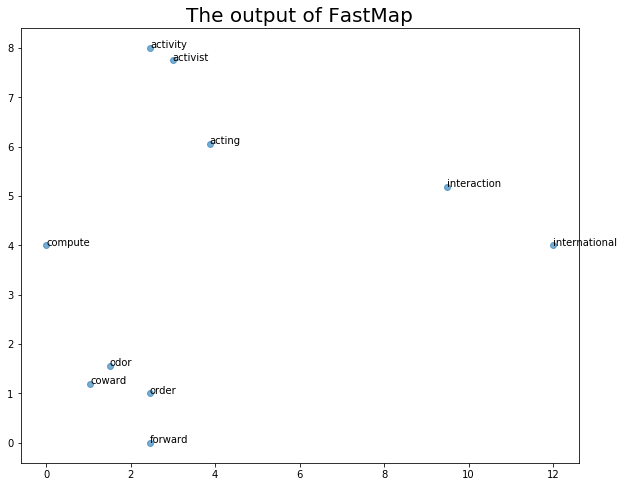

In [87]:
plot_fastmap_result(coordinate, label)

# Part 2: Software Familiarization

## PCA

In [88]:
from sklearn.decomposition import PCA 

In [89]:
data = pd.read_csv("pca-data.txt", header = None, sep="\t")

In [90]:
pca=PCA(n_components=2)
newData=pca.fit_transform(data)
newData

array([[-10.87667009,   7.37396173],
       [ 12.68609992,  -4.24879151],
       [ -0.43255106,   0.26700852],
       ...,
       [  2.92254009,   2.41914881],
       [-11.18317124,   4.20349275],
       [-14.2299014 ,   5.64409544]])